In [1]:
# NAME: KAUSHAL JAIN

# EMAIL: jainkaushal899@gmail.com

# BATCH: MACHINE LEARNING WITH PYTHON

# PROJECT NAME- PREDICTION OF HEART DISEASE DETECTION

# CERTIFICATION CODE: TCRIG02R65

In [2]:
# Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings('ignore')

In [3]:
#Importing the Dataset

dataset = pd.read_csv(r'C:\Users\jaink\Downloads\heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
dataset.shape

(303, 14)

In [6]:
# Checking total number of NULL values

dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
#Exploratory Data Analyis

In [10]:
#Analysing the variables

dataset['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [11]:
dataset.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

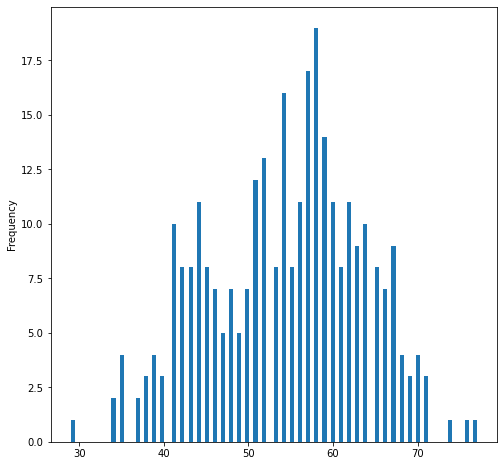

In [12]:
dataset.age.plot(kind = 'hist', bins = 100, figsize = (8,8))
plt.show()

<AxesSubplot:xlabel='target', ylabel='count'>

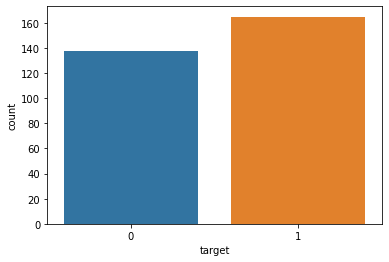

In [13]:
sns.countplot(dataset['target']) 

In [14]:
dataset['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='target'>

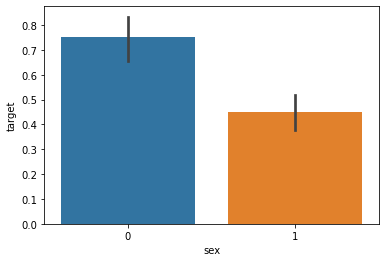

In [15]:
sns.barplot(dataset["sex"],dataset["target"])

In [16]:
dataset.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

<AxesSubplot:xlabel='cp', ylabel='target'>

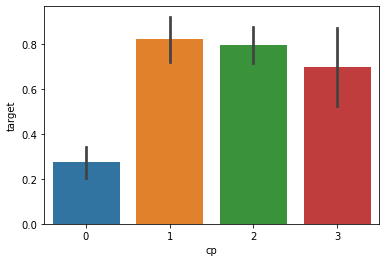

In [17]:
sns.barplot(dataset["cp"],dataset['target'])

In [18]:
dataset.restecg.value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

<AxesSubplot:xlabel='restecg', ylabel='target'>

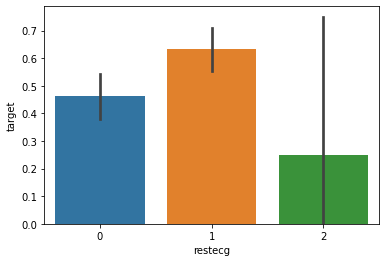

In [19]:
sns.barplot(dataset["restecg"],dataset['target'])

In [20]:
dataset.exang.value_counts()

0    204
1     99
Name: exang, dtype: int64

<AxesSubplot:xlabel='exang', ylabel='target'>

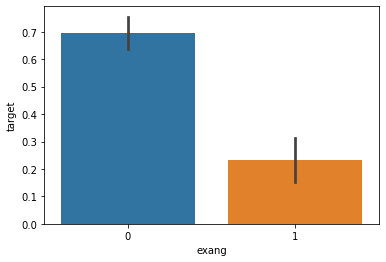

In [21]:
sns.barplot(dataset["exang"],dataset['target'])

In [22]:
dataset.slope.value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

<AxesSubplot:xlabel='slope', ylabel='target'>

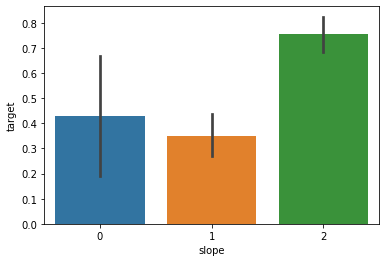

In [23]:
sns.barplot(dataset["slope"],dataset['target'])

In [24]:
dataset.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

<AxesSubplot:xlabel='ca', ylabel='target'>

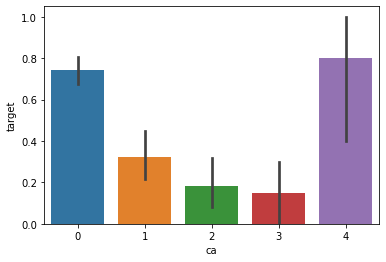

In [25]:
sns.barplot(dataset["ca"],dataset['target'])

In [26]:
dataset.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

<AxesSubplot:xlabel='thal', ylabel='target'>

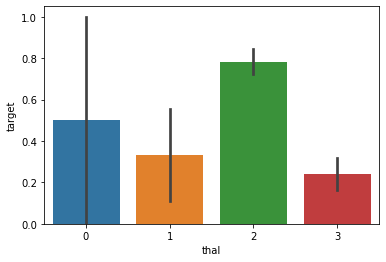

In [27]:
sns.barplot(dataset["thal"],dataset['target'])

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

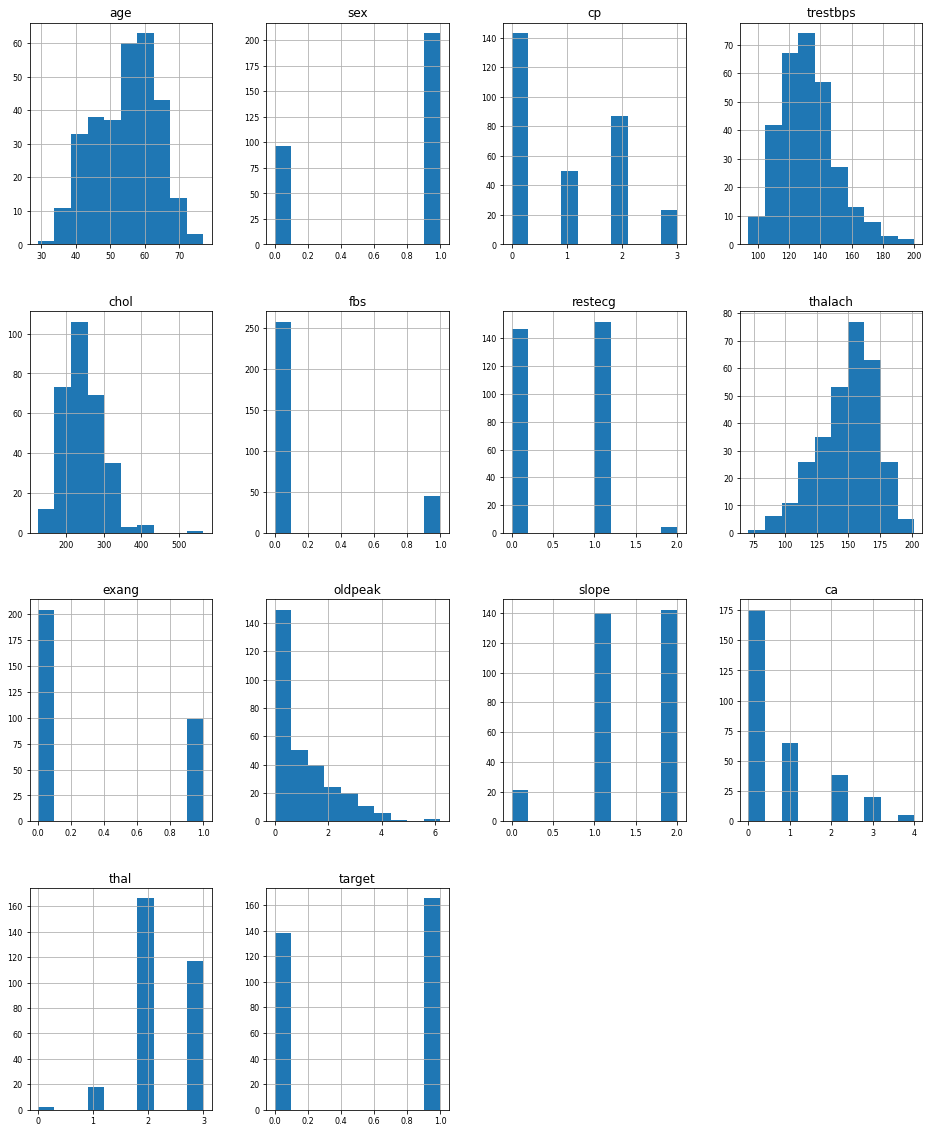

In [28]:
#Overview distribution of each column

dataset.hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8)

In [29]:
#Scaling the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dataset.drop('target' , axis =1))
scaler_features = scaler.transform(dataset.drop("target" , axis= 1))
df_feat = pd.DataFrame(scaler_features , columns = dataset.columns[:-1])

In [30]:
df_feat.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


In [31]:
df_feat.shape

(303, 13)

In [32]:
#Splitting the dataset into Train and Test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_feat, dataset['target'], test_size=0.30, random_state=101)

In [33]:
#Shape of train and test data
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (212, 13) (212,)
Test set: (91, 13) (91,)


In [34]:
# Using KNeighbors Classifier

from sklearn.neighbors import KNeighborsClassifier

In [35]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

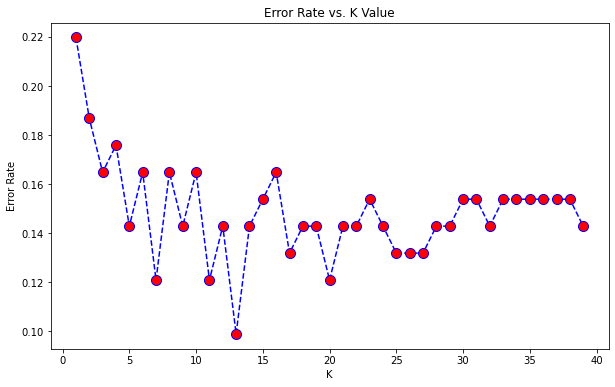

In [36]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [37]:
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train , y_train)
pred = knn.predict(X_test)

In [38]:
pred.shape

(91,)

In [39]:
print("Predicted Values : ",pred)

Predicted Values :  [0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1
 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0
 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0]


In [40]:
y_test

221    0
8      1
89     1
154    1
201    0
      ..
247    0
85     1
280    0
31     1
190    0
Name: target, Length: 91, dtype: int64

In [41]:
#Accuracy calculation

from sklearn import metrics
accuracy_knn = metrics.accuracy_score(y_test, pred)

print("The accuracy score of KNN is: ",accuracy_knn)

The accuracy score of KNN is:  0.9010989010989011


In [42]:
# Making confusion matrix and classification report

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[37  7]
 [ 2 45]]


In [43]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89        44
           1       0.87      0.96      0.91        47

    accuracy                           0.90        91
   macro avg       0.91      0.90      0.90        91
weighted avg       0.91      0.90      0.90        91



In [44]:
# Conclusion:

# Thus, the accuracy achieved by using KNN is around 90.1 %.

In [55]:
# SUBMITTED BY:

# NAME: KAUSHAL JAIN

# PROJECT NAME- PREDICTION OF HEART DISEASE DETECTION